## Business case: Based on the given features predict the price range of the cellphone

Price range:

0 - low cost
1 - medium cost
2 - high cost
3 - very high cost

Aim is to predict the price range based on the given features

### Understand the data

- battery_power - Total energy a battery can store in one time measured in mAh
- blue - Has bluetooth or not
- clock_speed - speed at which microprocessor executes instructions
- dual_sim - Has dual sim support or not
- 	fc - Front Camera mega pixels
-	four_g - Has 4G or not
-	int_memory - Internal Memory in Gigabytes
-	m_dep - Mobile Depth in cm
-	mobile_wt - Weight of mobile phone
-	n_cores - Number of cores of processor
-	pc - Primary Camera mega pixels
-	px_height - Pixel Resolution Height
-	px_width - Pixel Resolution Width
-	ram - Random Access Memory in Megabytes
-	sc_h - Screen Height of mobile in cm
-	sc_w - Screen Width of mobile in cm
-	talk_time - longest time that a single battery charge will last when you are
-	three_g - Has 3G or not
-	touch_screen - Has touch screen or not
-	wifi - Has wifi or not
-	price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)


In [1]:
# import necessary modules and libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy import stats

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
# load the data
data = pd.read_csv('C:\work\CDS\internship\dataset\PRCP-1009-CellphonePrice\datasets_11167_15520_train.csv')

In [4]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


### Basic Checks

In [5]:
# examine the data
data.shape

(2000, 21)

Observation: There are 2000 rows and 21 columns

In [6]:
# columns in data
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# check first 5 rows
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
# check last 5 rows
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
#check null values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

It seems there is no null value and all columns are numeric

In [11]:
# statistics of available data
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Exploratory Data Analysis
### Univaraite Analysis

In [86]:
!pip install sweetviz

In [87]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights from Univariate analysis
- Battery range varies from 501 mAh to 1998 mAh
- Almost 50% of the cellphones have bluetooth
- Clock speed for most of the cellphones is at 0.5 with 3.0 being the highest clock speed
- 51% of the cellphones have dual sim
- Almost 48% of the cellphones have front camera with less than 6 MP and 24% of cellphones do not have front camera
- 52% of the cellphone have 4G
- Internal memory ranges from 2Gb to 64GB
- The thinnest cellphone has depth of 0.1 cm with 1 cm being the thickest mobile depth
- Most of the cellphones have average weight of 140 gms with 80 gms being the lightest and 200gms being the heaviest cellphone
- The number of cores for a cellphone range from 1 to 8
- 5% of the cellphones do not have primary camera wheras others have 1MP to 20MP as primary camera
- RAM for the cellphone ranges from 256MB to 3998MB
- Screen height ranges from 5cm to 19cm and width ranges from 0 to 18cm
- 2hrs is the minimum talk time for a cellphone with 20 hrs being highest talktime for a single battery charge 
- 76% of the cellphones are 3G enabled
- Half of the cellphone models are touch screen
- 51% of the cellphones have wifi support

### Bivariate Analysis

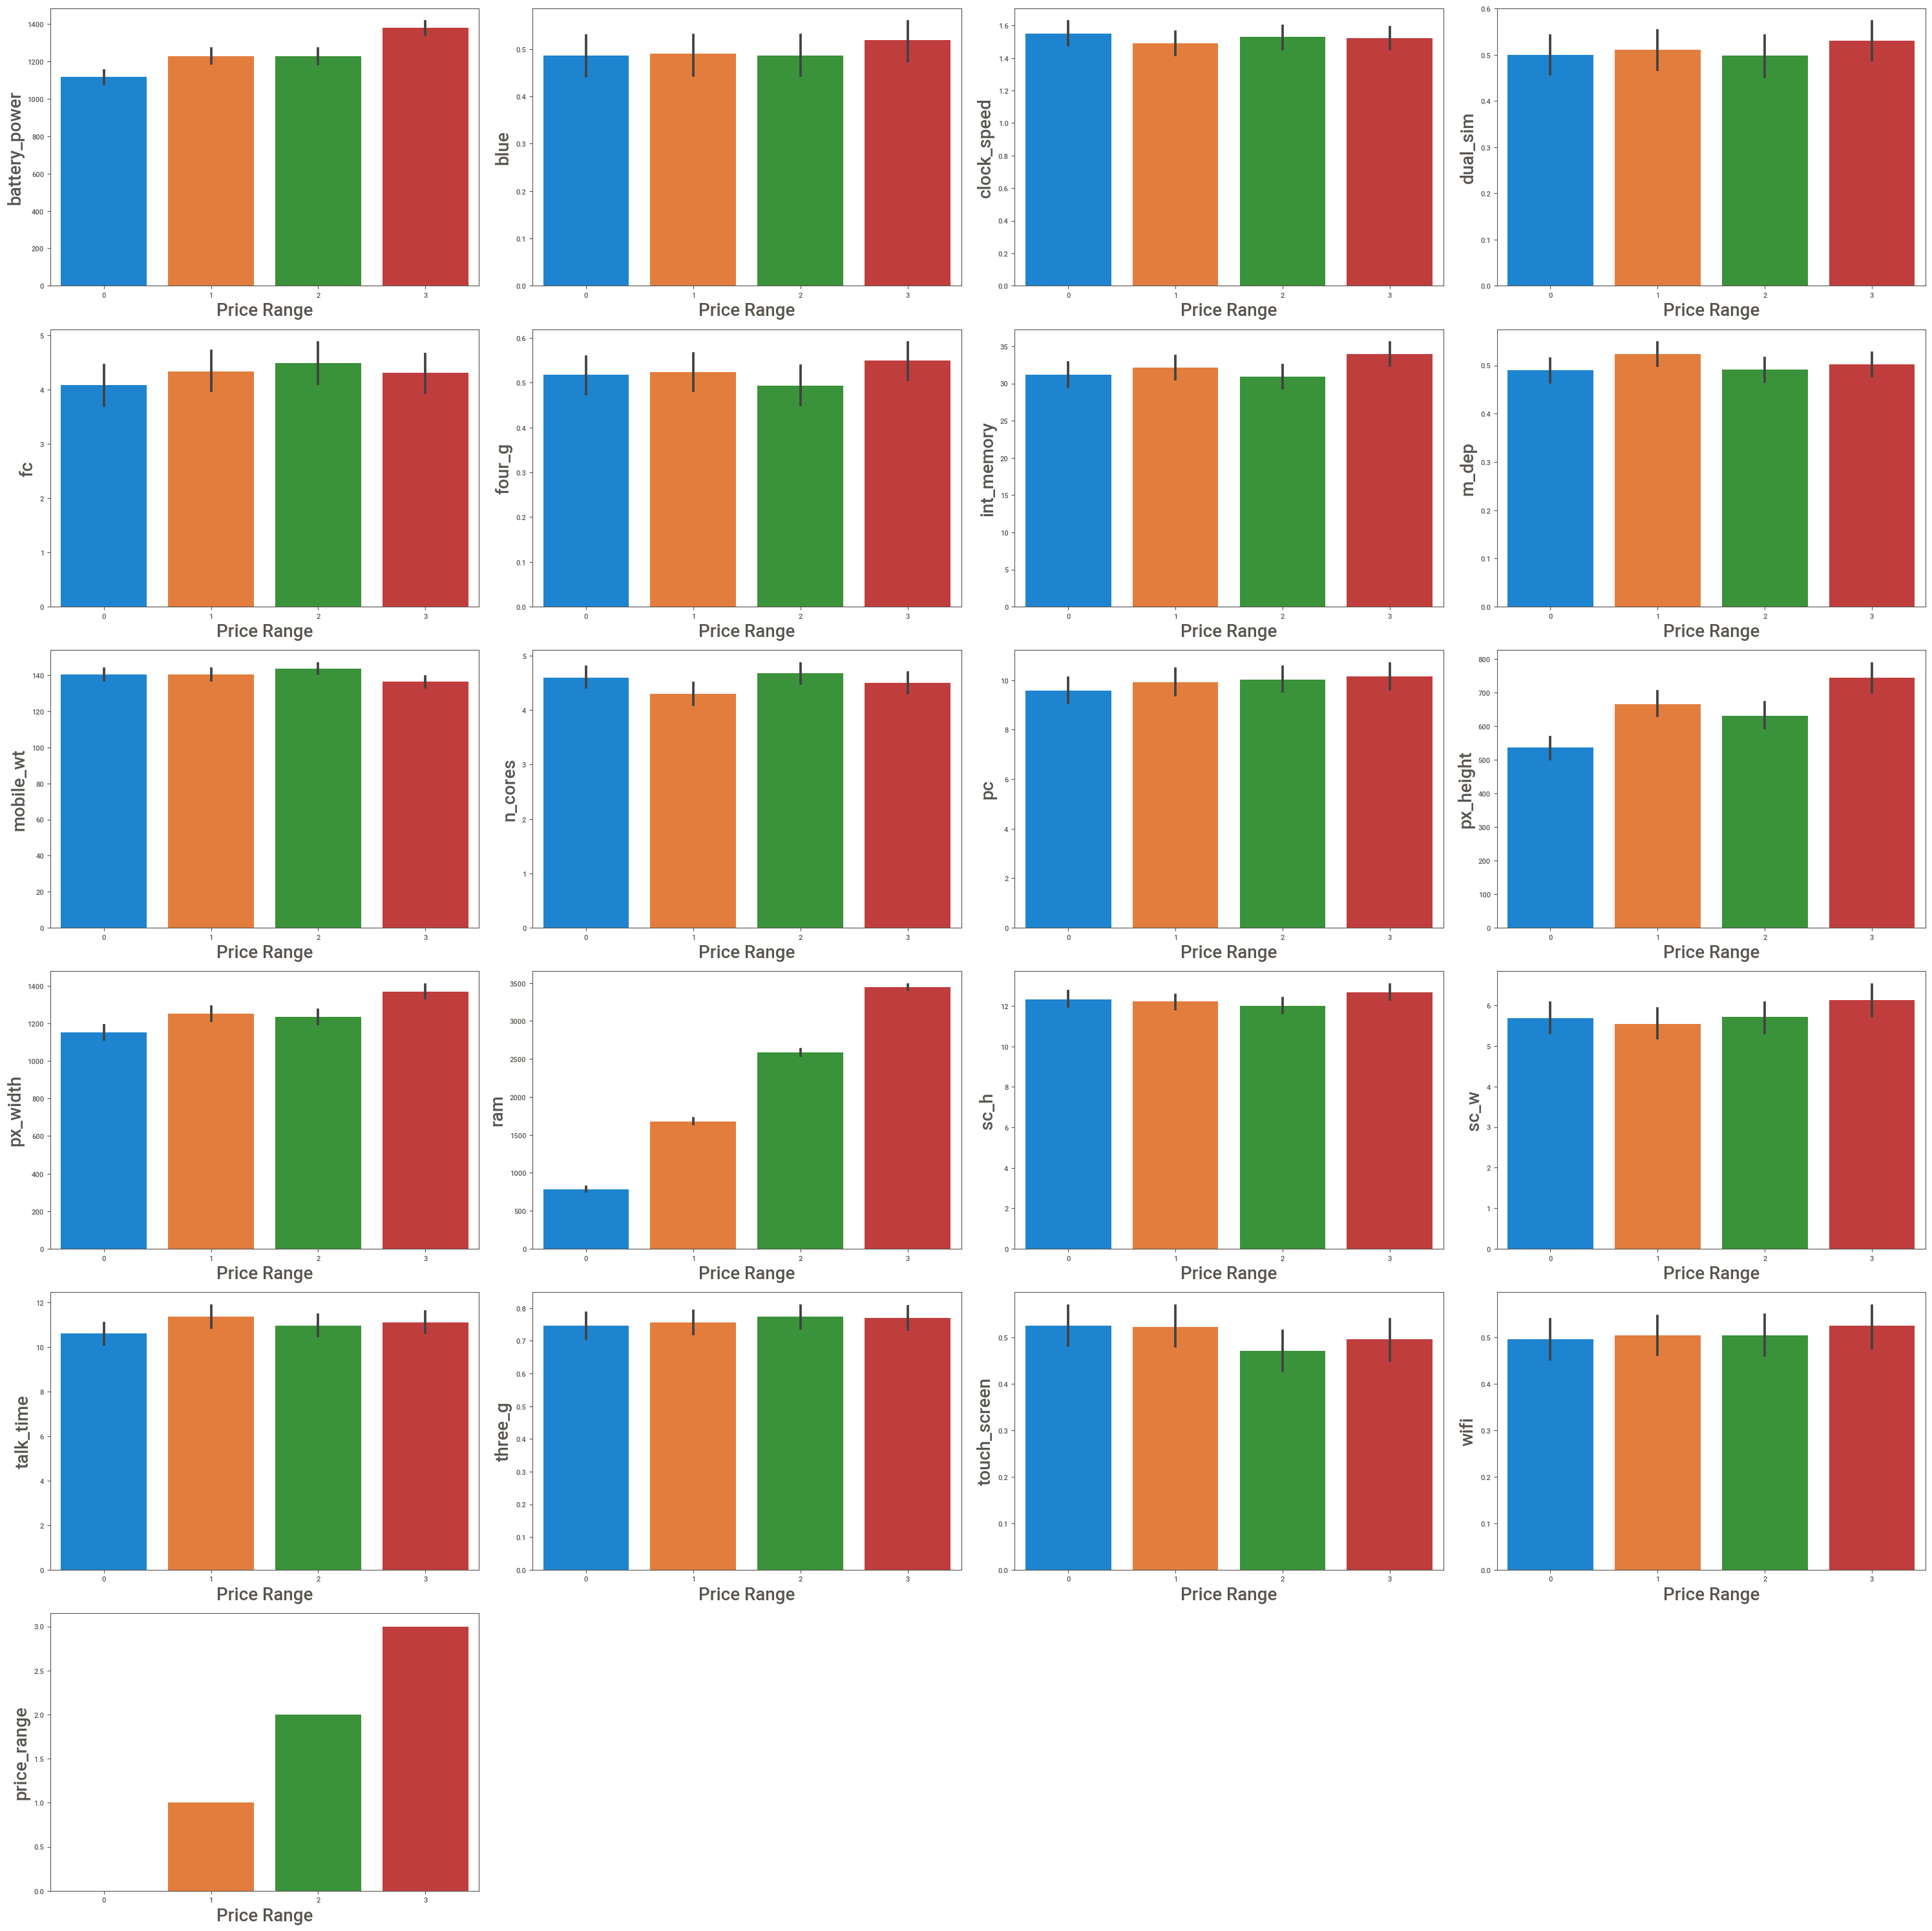

In [88]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for column in data:
    if(plotnum<=21):
        ax=plt.subplot(6,4,plotnum)
        sns.barplot(x=data.price_range,y=data[column])
        plt.xlabel('Price Range',fontsize=20)
        plt.ylabel(column,fontsize=20)
        
    plotnum+=1
plt.tight_layout() 

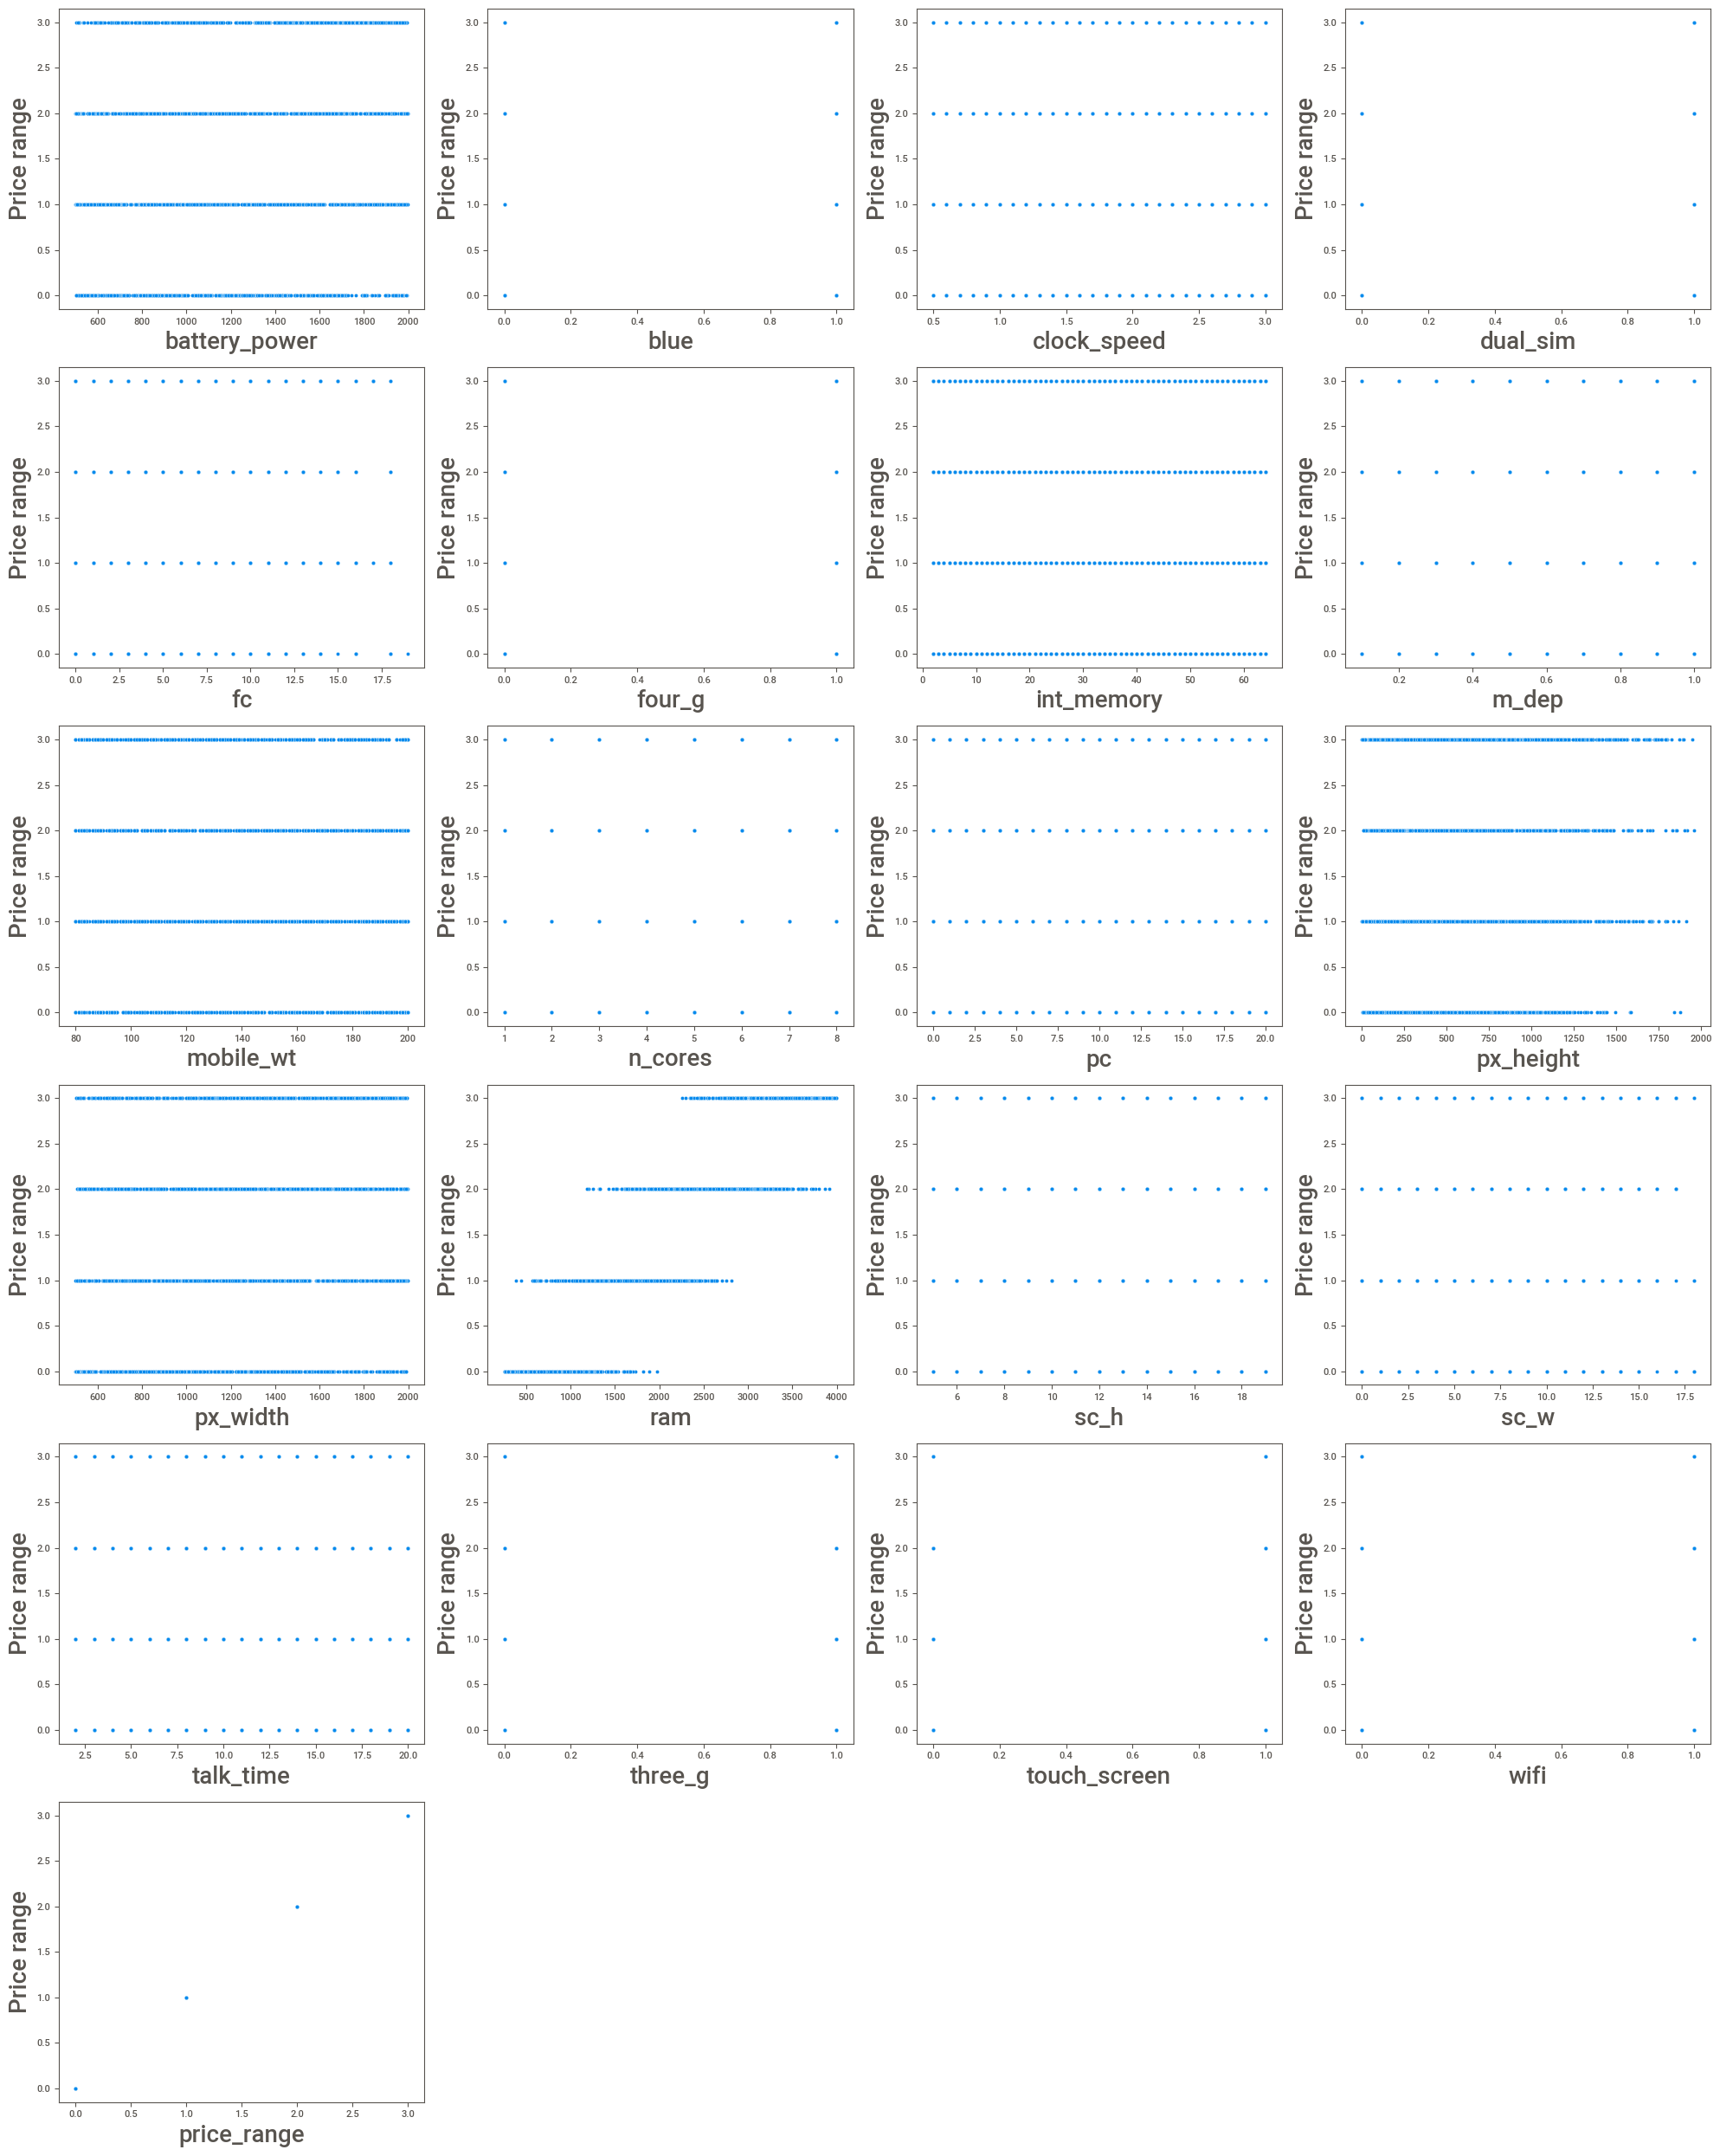

In [89]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data:#acessing columns form data2 DataFrame
    if plotnumber<=21 :#checking whether counter is less than 16 or not
        ax = plt.subplot(6,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.scatterplot(x=data[column] ,y=data.price_range)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('Price range',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

### Insights from Bivariate analysis
- Battery power is high for high end phones compared to cheaper phones.
- High range phones have higher internal memory, whereas low range and mid-high range have similar type of internal memory.
- For RAM, price increases as the RAM increases, so that high range phones will have higher RAM.
- High range cellphones have higher pixels compared to others.
- Weight of high range phones is less

## Data Preprocessing

### Check missing/null values

In [12]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- There are no null or missing values.

### check duplicate values

In [13]:
len(data[data.duplicated()])

0

There are no duplicate rows

### check unique values for each column

In [14]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Handle corrupt data
Pixel height and Screen width have some datapoints as zero. Replace them with median

In [15]:
data.loc[data['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [16]:
data.loc[data['sc_w']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,11,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,17,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,1,64,745,1503,10,0,13,0,0,0,0


In [17]:
# Replace pixel height having value as 0 with the median
data['px_height'] = data['px_height'].replace(0,data['px_height'].median())

In [18]:
data.loc[data['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [19]:
# Replace screen width having value as 0 with median
data['sc_w'] = data['sc_w'].replace(0, data['sc_w'].median())

In [20]:
data.loc[data['sc_w']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


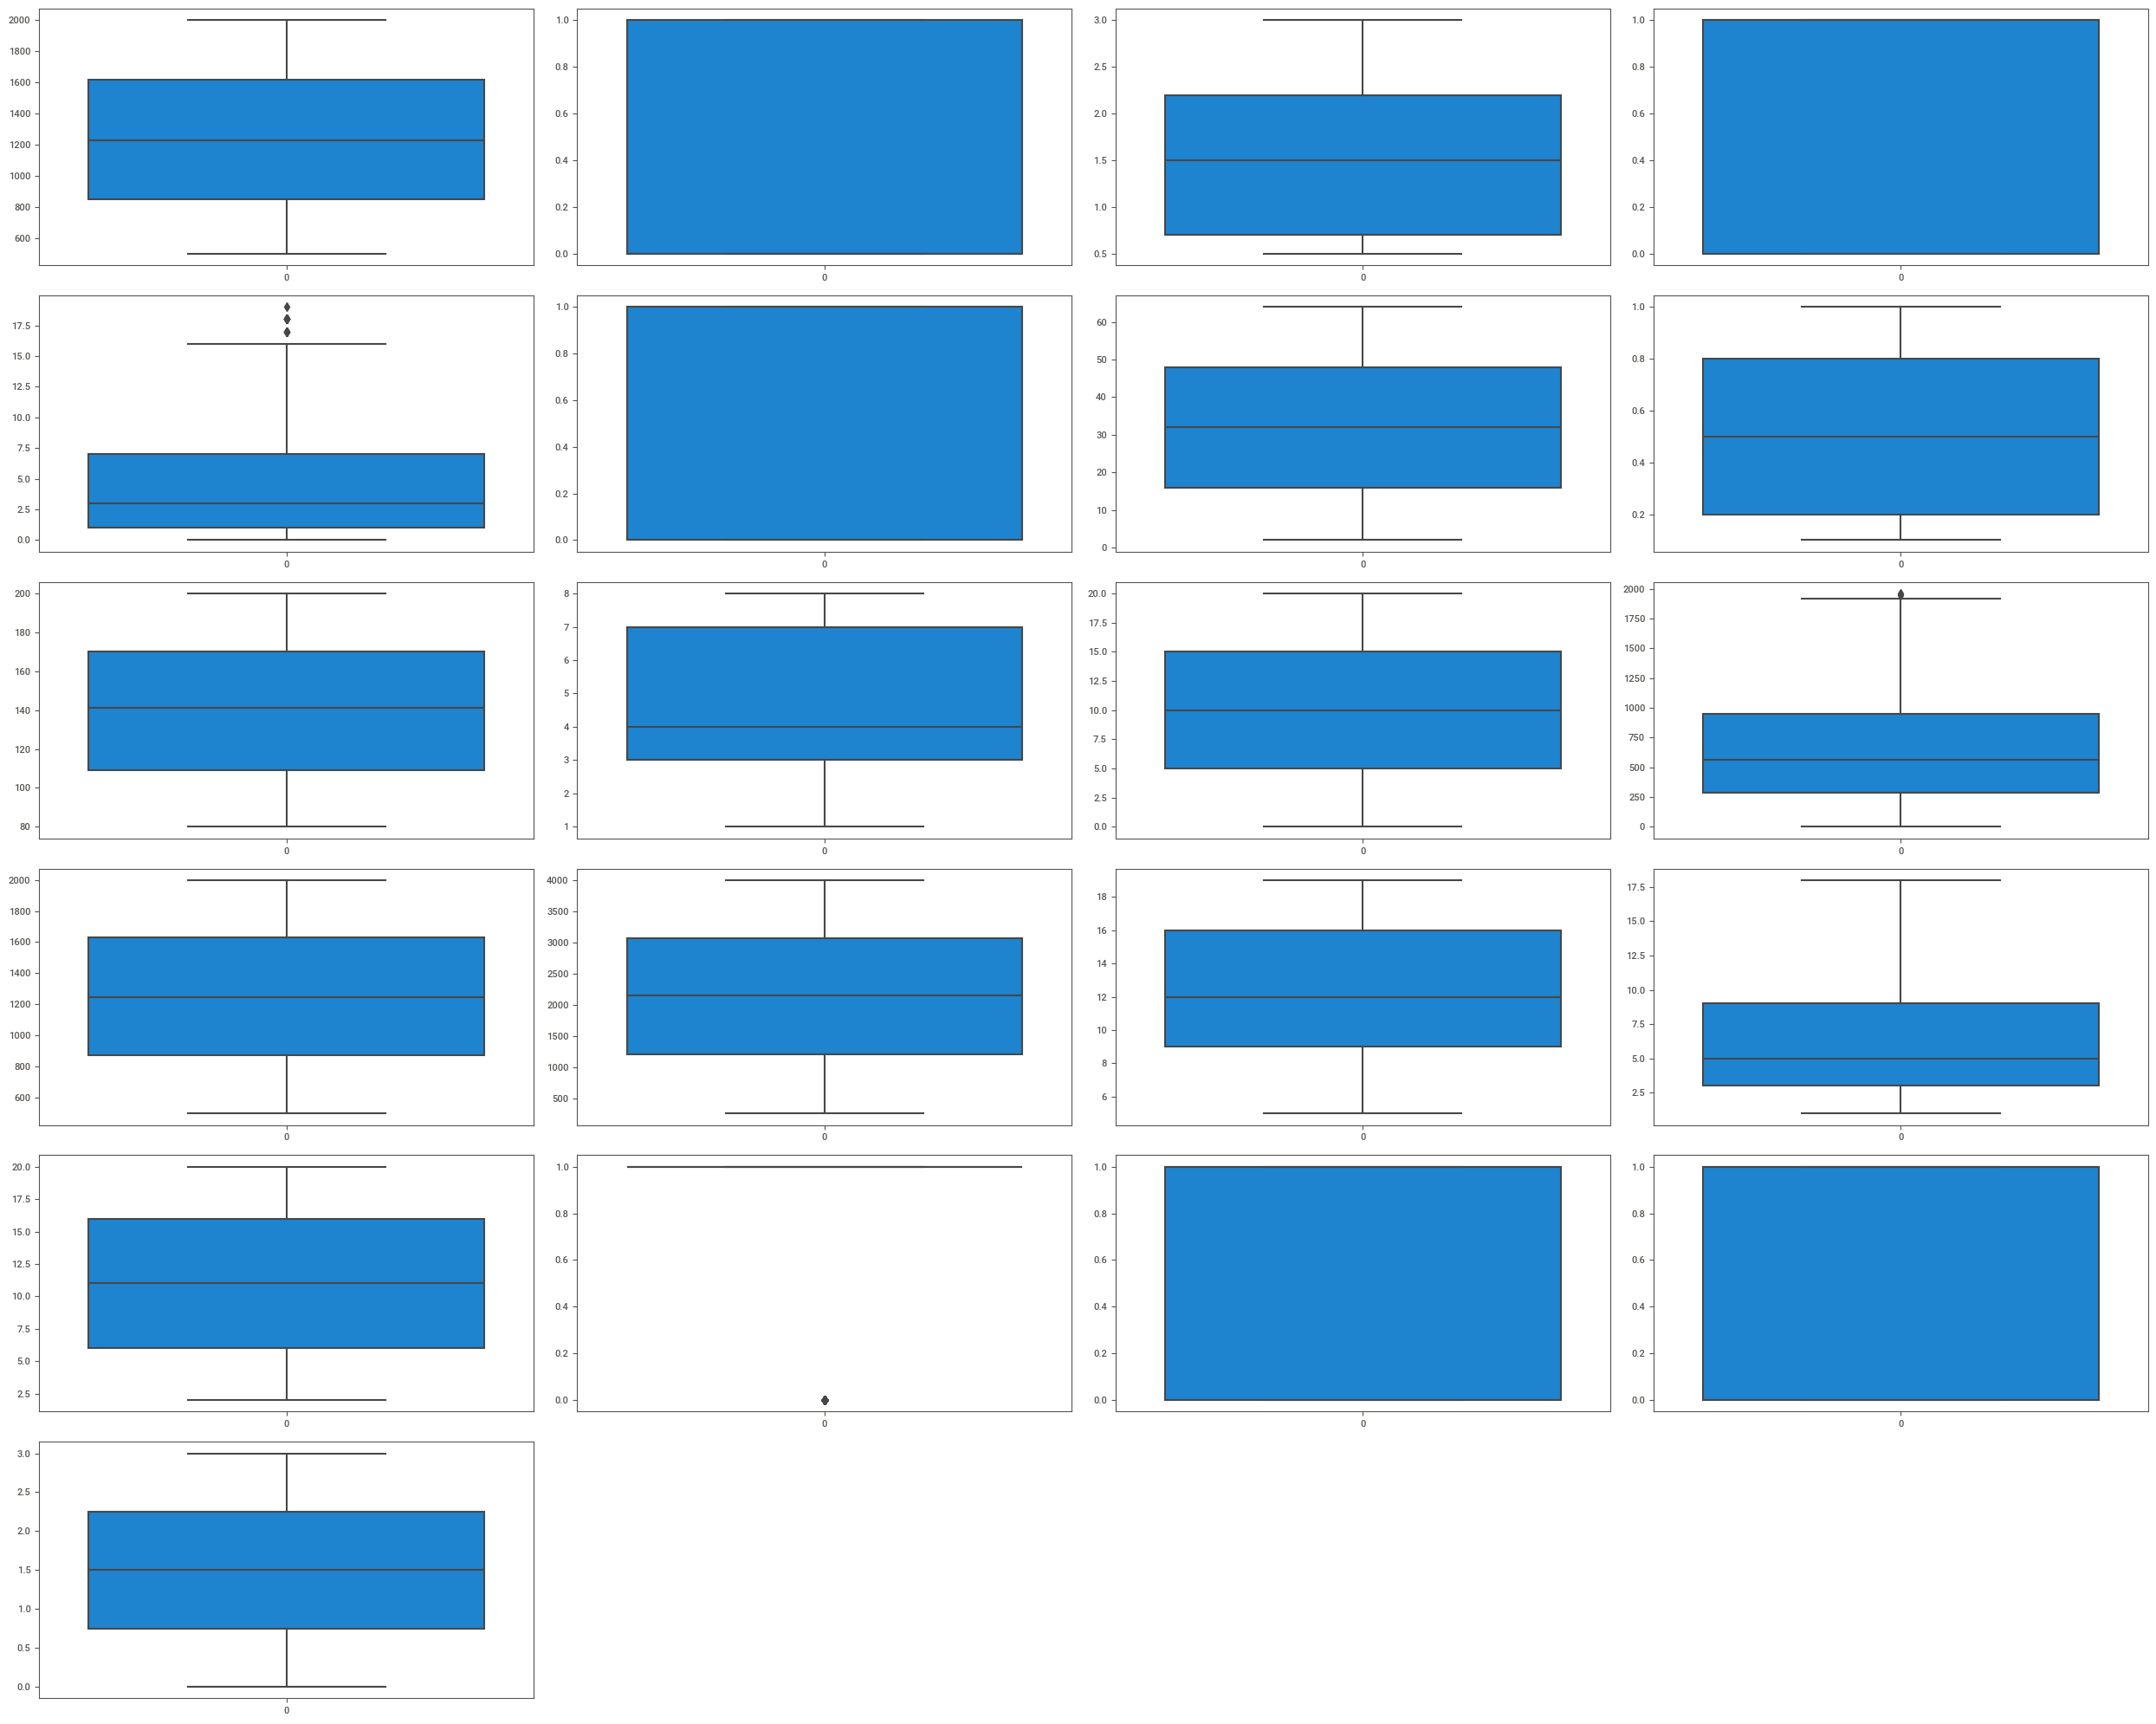

In [99]:
# Check for Outliers
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=21 :
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column])
       
    plotnumber+=1
plt.tight_layout()   

There seems to be no outliers

In [21]:
# combine screen height and width to form a single feature scree size and convert from cms to inches
data['sc_size'] = round((data['sc_h'] * data['sc_w']) / 2.54, 2)
data.drop(columns=['sc_h', 'sc_w'], inplace = True)

In [22]:
# combine pixel width and pixel height to form a single feature pixels
data['pixels'] = data['px_height'] * data['px_width']
data.drop(['px_height', 'px_width'], axis = 1, inplace=True)

In [23]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_size,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,24.80,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,20.08,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,8.66,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,50.39,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,6.30,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,0,20.47,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,2,43.31,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3,3.54,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,0,70.87,225120


## Feature Selection

No redundant features. We will check for correlation

<function matplotlib.pyplot.show(close=None, block=None)>

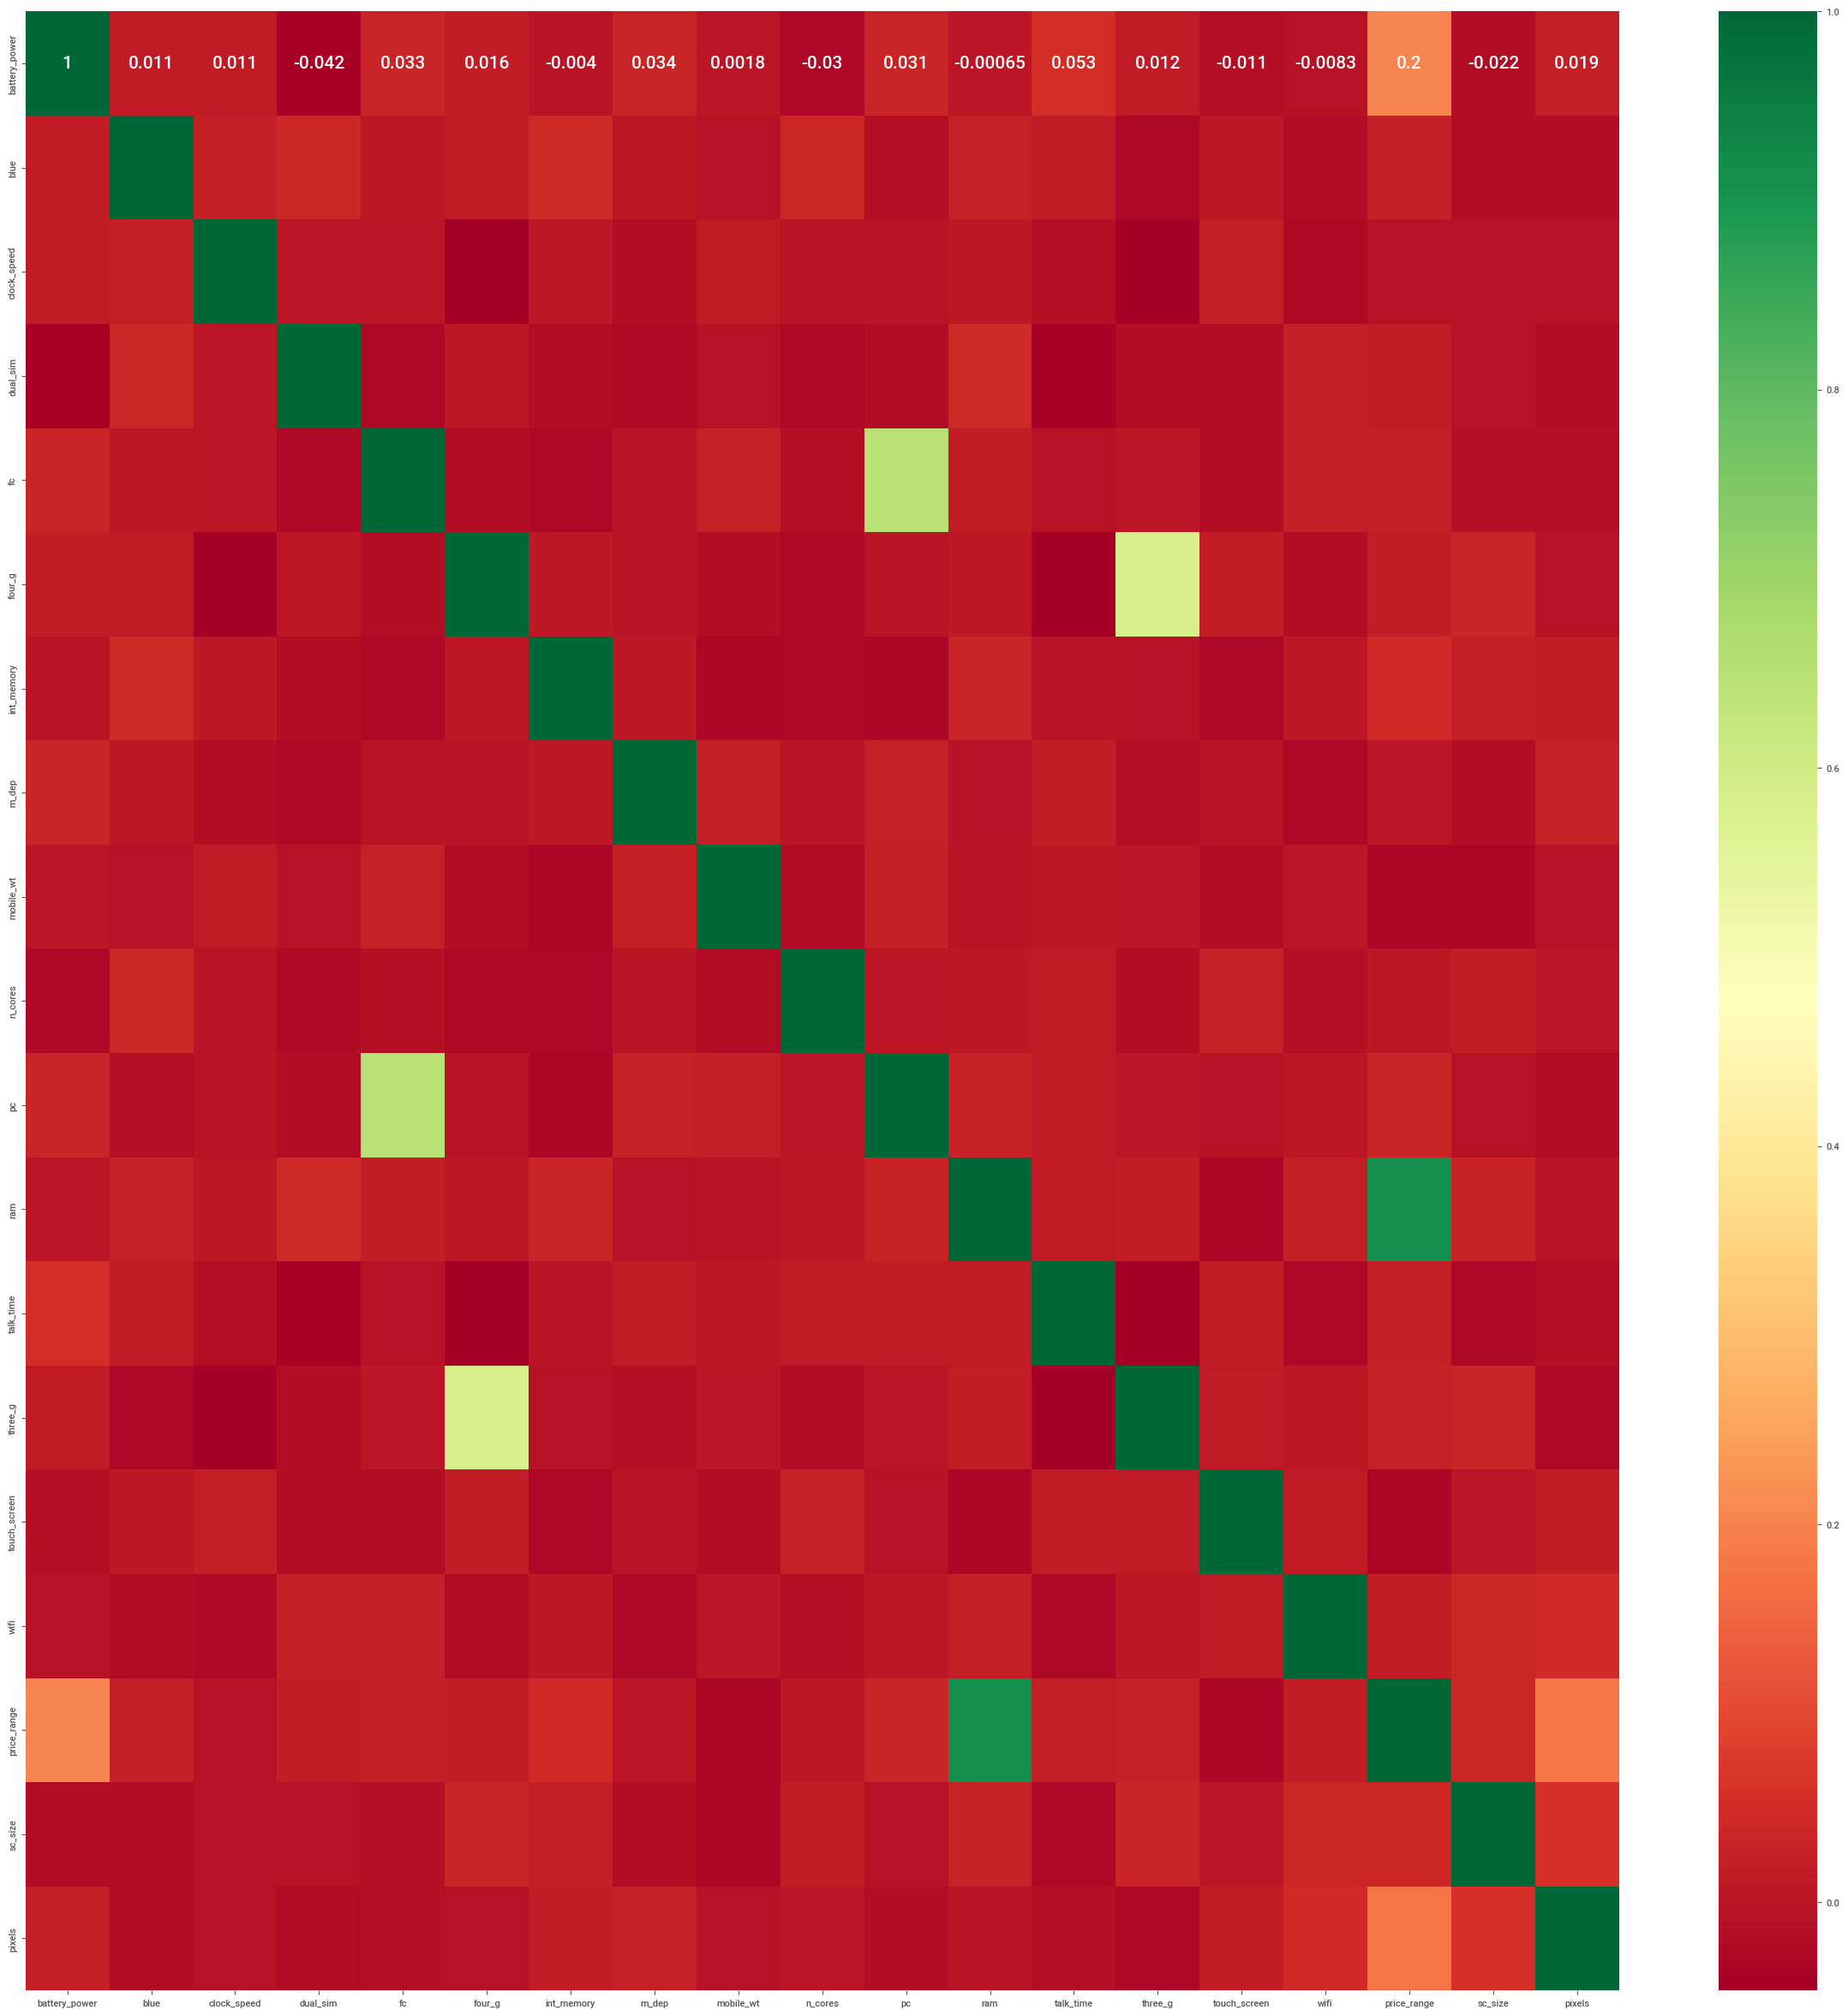

In [103]:
# check correlation
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show

### Feature scaling

In [60]:
# create dependent and independent variable
y = data.price_range # dependent variable
x = data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'sc_size', 'pixels']] # independent variable
#x = list(set(data.columns.tolist()) - {y})


In [64]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_size,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,24.80,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,20.08,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,8.66,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,50.39,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,6.30,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,20.47,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,43.31,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3.54,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,70.87,225120


In [30]:
# create training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model Creation

### Decision Tree

In [32]:
# Model creation using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # object creation
dt.fit(x_train, y_train) # training the model


DecisionTreeClassifier()

In [33]:
# Predict the model
y_pred = dt.predict(x_test)

In [34]:
y_pred

array([0, 2, 0, 3, 1, 2, 2, 0, 2, 1, 0, 1, 3, 2, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 1, 0, 3, 0, 1, 1, 3, 1, 3, 0, 1, 2, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 2, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 2, 3, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 1, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 2, 3, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 3, 2, 0, 0, 3, 3, 0, 2, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       3, 1, 3, 0, 1, 3, 2, 3, 2, 0, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [35]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

#check accuracy score
accuracy_score(y_test,y_pred)

0.818

In [36]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[116,  16,   0,   0],
       [ 10,  94,  14,   0],
       [  0,  19,  83,  18],
       [  0,   0,  14, 116]], dtype=int64)

In [37]:
# generate classification report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.88      0.90       132\n           1       0.73      0.80      0.76       118\n           2       0.75      0.69      0.72       120\n           3       0.87      0.89      0.88       130\n\n    accuracy                           0.82       500\n   macro avg       0.82      0.81      0.81       500\nweighted avg       0.82      0.82      0.82       500\n'

### SVM

In [38]:
# model creation using SVM classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [39]:
# prediction using SVC
y_pred = svc.predict(x_test)

In [40]:
# check accuracy score
accuracy_score(y_test, y_pred)

0.84

In [41]:
# generate classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.91       132\n           1       0.76      0.79      0.78       118\n           2       0.77      0.78      0.77       120\n           3       0.92      0.88      0.90       130\n\n    accuracy                           0.84       500\n   macro avg       0.84      0.84      0.84       500\nweighted avg       0.84      0.84      0.84       500\n'

In [42]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[120,  12,   0,   0],
       [ 13,  93,  12,   0],
       [  0,  17,  93,  10],
       [  0,   0,  16, 114]], dtype=int64)

### Random Forest

In [43]:
# Model creation using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
# prediction
y_pred = rf.predict(x_test)

In [45]:
# check accuracy score
accuracy_score(y_test, y_pred)

0.87

In [46]:
# generate classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.95      0.94       132\n           1       0.82      0.84      0.83       118\n           2       0.80      0.78      0.79       120\n           3       0.91      0.89      0.90       130\n\n    accuracy                           0.87       500\n   macro avg       0.87      0.87      0.87       500\nweighted avg       0.87      0.87      0.87       500\n'

In [47]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[126,   6,   0,   0],
       [ 10,  99,   9,   0],
       [  0,  15,  94,  11],
       [  0,   0,  14, 116]], dtype=int64)

### Hyperparameter tuning for Random Forest

In [123]:
# tuning using RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

# initialize parameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

# dictionary for hyperparameters
random_grid = {'n_estimators' : n_estimators, 'max_features' : max_features,
              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf, 'bootstrap' : bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring = 'accuracy', param_distributions = random_grid, n_iter=100,
                          cv = 3, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(rf_best_params)


KeyboardInterrupt



In [ ]:
# Pass best parameters to Random forest classifier
rf_clf1 = RandomForestClassifier(n_estimators= 1400, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False)
rf_clf1.fit(x_train, y_train)
y_predcv = rf_clf1.predict(x_test)
accuracy_score(y_test, y_predcv)

### Logistic Regression

In [48]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression
logRgr = LogisticRegression()
logRgr.fit(x_train, y_train)

LogisticRegression()

In [49]:
# prediction using test data
y_pred = logRgr.predict(x_test)

In [50]:
# check accuracy score
accuracy_score(y_test, y_pred)

0.912

In [51]:
# classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95       132\n           1       0.87      0.92      0.89       118\n           2       0.89      0.84      0.87       120\n           3       0.92      0.95      0.93       130\n\n    accuracy                           0.91       500\n   macro avg       0.91      0.91      0.91       500\nweighted avg       0.91      0.91      0.91       500\n'

In [52]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[124,   8,   0,   0],
       [  5, 108,   5,   0],
       [  0,   8, 101,  11],
       [  0,   0,   7, 123]], dtype=int64)

## Feature Importance

In [53]:
importances = rf.feature_importances_
importances

array([0.07828179, 0.00721514, 0.03078016, 0.00690147, 0.02673636,
       0.00691847, 0.04300589, 0.02722814, 0.04533077, 0.02331731,
       0.03195574, 0.50246762, 0.03385988, 0.00627679, 0.00729824,
       0.00729278, 0.04091785, 0.0742156 ])

In [54]:
indices = np.argsort(imp)
indices

array([13,  3,  5,  1, 15, 14,  9,  4,  7,  2, 10, 12, 16,  6,  8, 17,  0,
       11], dtype=int64)

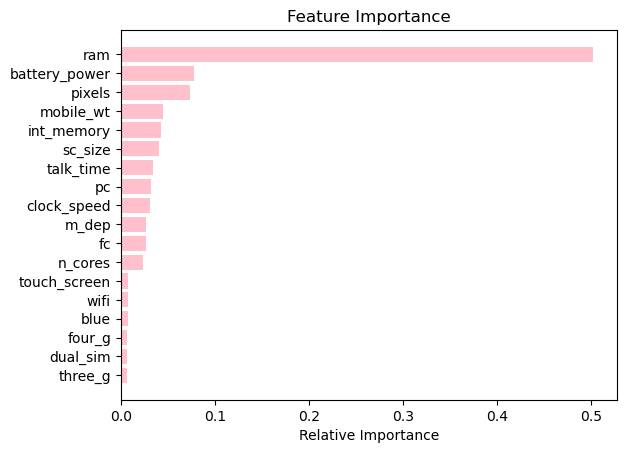

In [67]:
# plot the graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [x.columns[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

From the above graph we can conclude that RAM, battery power and pixels are of important f.eatures for the sales of mobile phones